<a href="https://colab.research.google.com/github/Menna1410/Analysis-Assignments/blob/main/Pose_Estimation_SEE_Assessment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📍 Pose Estimation - 2D Keypoint Extraction Using YOLOv8

This notebook performs 2D human pose estimation on exercise images using the YOLOv8 pose model. It detects joints such as shoulders, elbows, hips, knees, and ankles, and extracts their coordinates for further biomechanical analysis.

The extracted keypoints are saved in a structured CSV file for use in subsequent steps like joint angle computation and load estimation.

**Components**:
- Dataset upload (manual image or ZIP)
- YOLOv8 model loading and inference
- Keypoint extraction (COCO format: 17 landmarks)
- Annotated image saving
- Output CSV with joint coordinates

# 1. Installing Required Packages

In [1]:
# Install Ultralytics YOLO and supporting libraries
!pip install ultralytics
!pip install opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# 2. Importing Libraries

In [4]:
# Import essential libraries
from ultralytics import YOLO
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import zipfile
import pandas as pd
import math

# 3. Load YOLOv8 Pose Model (Run This Once)

In [5]:
# Load the YOLOv8 pose model (n = nano version, fast and light)
model = YOLO("yolov8l-pose.pt")

# 4A. Option 1 for a Single or Few Images (Manual Upload)

In [6]:
# Upload one or more images from your local machine
uploaded = files.upload()

# Automatically get the uploaded image path
image_files = list(uploaded.keys())
image_path = image_files[0]  # 1st file

Saving 26e3315e0c4cb6e8ba29a6c20f25a7f9.jpg to 26e3315e0c4cb6e8ba29a6c20f25a7f9.jpg
Saving aaron-brogden-9y4MaTz2Js0-unsplash.jpg to aaron-brogden-9y4MaTz2Js0-unsplash.jpg
Saving alonso-reyes-0HlI76m4jxU-unsplash.jpg to alonso-reyes-0HlI76m4jxU-unsplash.jpg
Saving amine-mouzaoui-hYz9zszim3w-unsplash.jpg to amine-mouzaoui-hYz9zszim3w-unsplash.jpg
Saving anastase-maragos-iUzgePOoGko-unsplash.jpg to anastase-maragos-iUzgePOoGko-unsplash.jpg
Saving bhong-bahala-ix3lui38XRI-unsplash.jpg to bhong-bahala-ix3lui38XRI-unsplash.jpg
Saving coach.jpeg to coach.jpeg
Saving istockphoto-1293917526-612x612.jpg to istockphoto-1293917526-612x612.jpg
Saving istockphoto-1369575331-612x612.jpg to istockphoto-1369575331-612x612.jpg
Saving jeffrey-f-lin-QXzHGRXyYHE-unsplash.jpg to jeffrey-f-lin-QXzHGRXyYHE-unsplash.jpg
Saving john-fornander-TAZoUmDqzXk-unsplash.jpg to john-fornander-TAZoUmDqzXk-unsplash.jpg
Saving lawrence-crayton-IsSxH3_6WlE-unsplash.jpg to lawrence-crayton-IsSxH3_6WlE-unsplash.jpg
Saving n

Run pose estimation


image 1/1 /content/26e3315e0c4cb6e8ba29a6c20f25a7f9.jpg: 640x448 1 person, 59.4ms
Speed: 13.5ms preprocess, 59.4ms inference, 349.8ms postprocess per image at shape (1, 3, 640, 448)


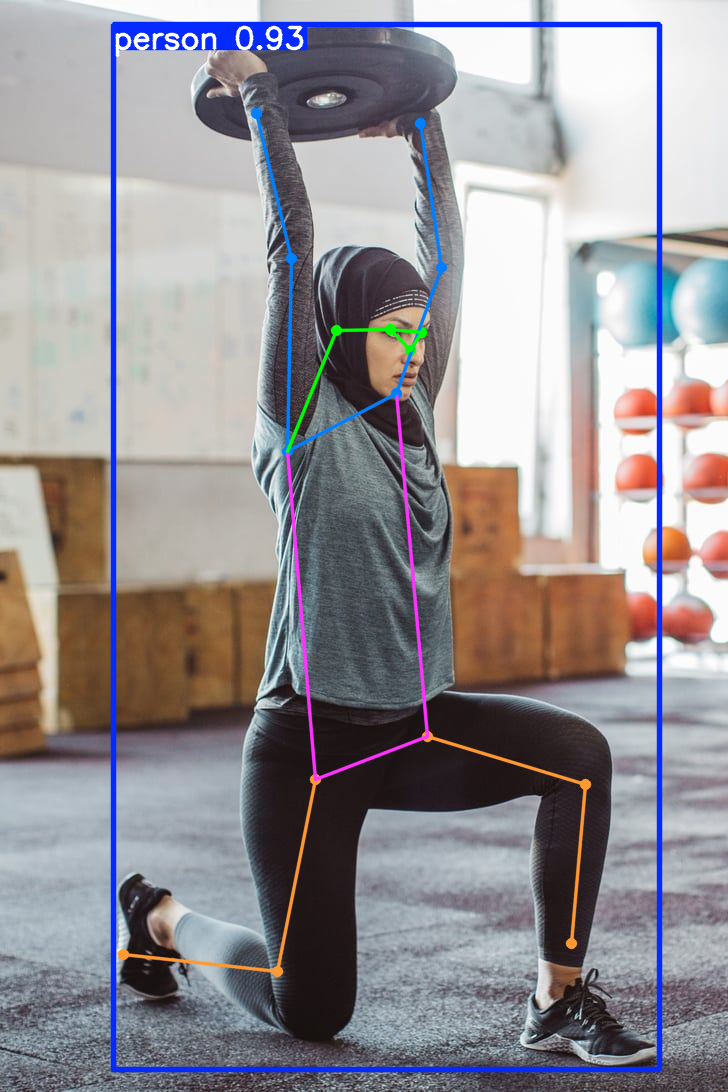

In [7]:
# Run inference
results = model(image_path)
results[0].show()

# 4B. Option 2 for Dataset (Upload ZIP & Batch Process)

In [10]:
uploaded = files.upload()  # Upload your ZIP file dataset

Saving Human Pose Estimation.zip to Human Pose Estimation.zip


In [24]:
zip_name = list(uploaded.keys())[0]

# Unzip dataset
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset/")

# Run YOLO on all images
image_files = [f for f in os.listdir("/content/dataset/PoseEstimation/PE/") if f.endswith(('.jpg', '.png'))]
os.makedirs("/content/outputs", exist_ok=True)

for image_file in image_files:
    image_path = os.path.join("/content/dataset//PoseEstimation/PE/", image_file)
    results = model(image_path)
    results[0].save(filename=f"/content/outputs/{image_file}")



image 1/1 /content/dataset/PoseEstimation/PE/3.jpg: 640x448 1 person, 47.3ms
Speed: 3.6ms preprocess, 47.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/dataset/PoseEstimation/PE/23.jpg: 640x448 1 person, 47.2ms
Speed: 3.4ms preprocess, 47.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/dataset/PoseEstimation/PE/16.jpg: 640x480 1 person, 49.4ms
Speed: 3.2ms preprocess, 49.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/PoseEstimation/PE/21.jpg: 448x640 1 person, 52.6ms
Speed: 3.5ms preprocess, 52.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/PoseEstimation/PE/13.jpg: 640x448 1 person, 48.6ms
Speed: 3.1ms preprocess, 48.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/dataset/PoseEstimation/PE/10.jpg: 640x512 1 person, 49.6ms
Speed: 3.4ms preprocess, 49.6ms inference,

# 5. Extract and Organize 2D Keypoints from YOLOv8 pose results

In [19]:
COCO_KEYPOINTS = {
    0: 'nose', 1: 'left_eye', 2: 'right_eye', 3: 'left_ear', 4: 'right_ear',
    5: 'left_shoulder', 6: 'right_shoulder', 7: 'left_elbow', 8: 'right_elbow',
    9: 'left_wrist', 10: 'right_wrist', 11: 'left_hip', 12: 'right_hip',
    13: 'left_knee', 14: 'right_knee', 15: 'left_ankle', 16: 'right_ankle'
}

Determine Input Source & Collect Image Paths

In [20]:
# Option 1 check: user manually uploaded image files (stored in /content/)
option1_images = [f for f in os.listdir("/content/") if f.lower().endswith(('.jpg', '.png'))]

# Option 2 check: dataset folder exists
dataset_folder = "/content/dataset/PoseEstimation/PE/"
option2_images = []

if os.path.exists(dataset_folder):
    option2_images = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder)
                      if f.lower().endswith(('.jpg', '.png'))]

# Merge both if needed
all_image_paths = []

# Add full path for Option 1 images
for img in option1_images:
    all_image_paths.append(os.path.join("/content", img))

# Add Option 2 dataset images
all_image_paths.extend(option2_images)

# Sanity check
print(f"📸 Total images to process: {len(all_image_paths)}")


📸 Total images to process: 75


Extract and Organize Keypoints for ALL Images

In [21]:
# Create a list to store keypoints for all images
keypoint_records = []

for image_path in all_image_paths:
    results = model(image_path)

    keypoints = results[0].keypoints.xy.cpu().numpy()

    if keypoints.shape[0] == 0:
        print(f"No person detected in {image_path}")
        continue

    # Use first person only
    person_kpts = keypoints[0]  # Shape: (17, 2)

    # Extract file name only (not full path)
    row = {'image': os.path.basename(image_path)}

    for i, (x, y) in enumerate(person_kpts):
        joint_name = COCO_KEYPOINTS[i]
        row[f"{joint_name}_x"] = float(x)
        row[f"{joint_name}_y"] = float(y)

    keypoint_records.append(row)


image 1/1 /content/aaron-brogden-9y4MaTz2Js0-unsplash.jpg: 640x448 1 person, 48.5ms
Speed: 3.2ms preprocess, 48.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/results_22.jpg: 640x448 1 person, 47.1ms
Speed: 3.8ms preprocess, 47.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/results_20.jpg: 448x640 1 person, 52.4ms
Speed: 5.8ms preprocess, 52.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/john-fornander-TAZoUmDqzXk-unsplash.jpg: 640x448 2 persons, 48.2ms
Speed: 3.8ms preprocess, 48.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/results_25.jpg: 640x576 1 person, 63.6ms
Speed: 3.6ms preprocess, 63.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /content/results_4.jpg: 640x448 2 persons, 37.4ms
Speed: 3.1ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)

i

In [16]:
# Create DataFrame
df_keypoints = pd.DataFrame(keypoint_records)
print("Keypoints DataFrame:")
df_keypoints.head()


Keypoints DataFrame:


,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,aaron-brogden-9y4MaTz2Js0-unsplash.jpg,1401.332642,1597.854248,1446.944336,1525.367065,1358.923218,1488.737671,0.00000,0.000000,1135.094727,...,1019.826477,3109.603271,1205.262939,3840.495361,1034.875000,3934.542969,0.000000,0.000000,0.000000,0.000000
1,john-fornander-TAZoUmDqzXk-unsplash.jpg,2121.877930,3358.743652,2171.137939,3230.602295,2080.133301,3278.068848,2452.16333,3098.942627,0.000000,...,2376.989746,5200.759277,2894.450195,6393.967285,2422.261963,6286.392090,3463.841553,7189.644043,2639.279541,7349.532715
2,pexels-andrewperformance1-733500.jpg,821.343445,650.343262,915.683655,526.811462,710.481079,539.409058,1056.92688,526.449890,571.784607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,pexels-johnny-garcia-1041229-2011377.jpg,1792.022217,974.793030,0.000000,0.000000,1687.227295,848.847595,0.00000,0.000000,1306.626221,...,780.840820,2661.416260,2092.994629,2757.151123,1876.455933,2851.715088,3121.374268,2897.208252,3012.409912,3216.100098
4,pexels-shvetsa-4587381.jpg,2427.232178,996.484314,2471.211182,882.327026,2359.252197,871.895264,0.00000,0.000000,2057.656738,...,1895.375488,2790.837646,3195.959717,2483.524170,1931.501587,3489.845703,2956.810303,3543.261475,0.000000,0.000000


In [17]:
df_keypoints.to_csv("/content/keypoints.csv", index=False)
print("Saved keypoints to /content/keypoints.csv")

Saved keypoints to /content/keypoints.csv
